## Dataset Analysis and Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import zscore


In [3]:
file_path = './WineQT.csv'

data = pd.read_csv(file_path)
df = pd.DataFrame(data)
df = df.drop(df.columns[-1], axis=1)
labels = df.columns.tolist()
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [4]:
# describing the dataset
stats = df.describe().transpose()
stats['attribute'] = stats.index
stats = stats[['attribute', 'mean', 'std', 'min', 'max']]
table = tabulate(stats, headers='keys', tablefmt='pretty', showindex=False)
print('Description of Dataset using mean, standard deviation, min, and max of all attributes')
print(table)

Description of Dataset using mean, standard deviation, min, and max of all attributes
+----------------------+---------------------+-----------------------+---------+---------+
|      attribute       |        mean         |          std          |   min   |   max   |
+----------------------+---------------------+-----------------------+---------+---------+
|    fixed acidity     |  8.311111111111119  |   1.747595017169539   |   4.6   |  15.9   |
|   volatile acidity   |  0.531338582677165  |  0.17963319302252445  |  0.12   |  1.58   |
|     citric acid      | 0.26836395450568584 |  0.1966858523482191   |   0.0   |   1.0   |
|    residual sugar    | 2.5321522309711257  |   1.355917466682676   |   0.9   |  15.5   |
|      chlorides       | 0.08693263342082211 |  0.04726733795238058  |  0.012  |  0.611  |
| free sulfur dioxide  | 15.615485564304462  |   10.25048612343082   |   1.0   |  68.0   |
| total sulfur dioxide |  45.91469816272966  |  32.782130307343124   |   6.0   |  289.0  |
|   

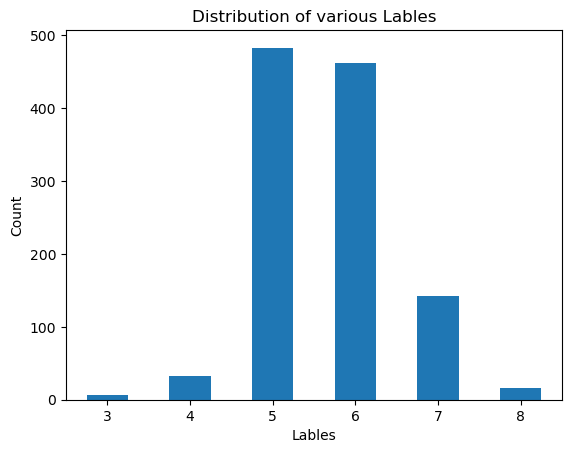

In [5]:
# Showing the distribution of lables in the dataset
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Lables')
plt.ylabel('Count')
plt.title('Distribution of various Lables')
plt.xticks(rotation=0)
plt.show()


In [6]:
X = df
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
missing_values = df.isnull().sum()
negative_values = (df < 0).sum()
z_scores = np.abs(zscore(df))
outliers_count = np.sum(z_scores > 3, axis=0)

attributes = df.columns
data = []
for attribute, missing, negative, outliers in zip(attributes, missing_values, negative_values, outliers_count):
    data.append([attribute, missing, negative, outliers])

# printing in the form of a table
table_df = pd.DataFrame(data, columns=['Attribute', 'Missing Values', 'Negative Values', 'Outliers'])
print(tabulate(table_df, headers='keys', tablefmt='pretty', showindex=False))

print('Since there are not many outliers, data is preprocessed')

+----------------------+----------------+-----------------+----------+
|      Attribute       | Missing Values | Negative Values | Outliers |
+----------------------+----------------+-----------------+----------+
|    fixed acidity     |       0        |        0        |    9     |
|   volatile acidity   |       0        |        0        |    5     |
|     citric acid      |       0        |        0        |    1     |
|    residual sugar    |       0        |        0        |    23    |
|      chlorides       |       0        |        0        |    21    |
| free sulfur dioxide  |       0        |        0        |    13    |
| total sulfur dioxide |       0        |        0        |    10    |
|       density        |       0        |        0        |    12    |
|          pH          |       0        |        0        |    5     |
|      sulphates       |       0        |        0        |    21    |
|       alcohol        |       0        |        0        |    7     |
|     